# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [ ]:
# Import libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_blobs, load_wine , fetch_20newsgroups
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklean.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Ironhack/CSV files/data_all.csv')

In [ ]:
data['e'].unique()

array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
       32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
       44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
       49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
       22., 56., 48., 52., 16., 17., 54., 21., 50., 45.])

In [ ]:
#pca
from sklearn.decomposition import PCA

In [ ]:
data.shape

(116322, 785)

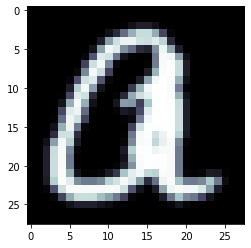

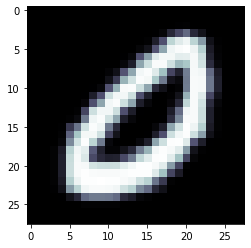

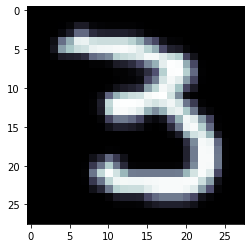

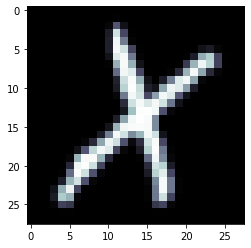

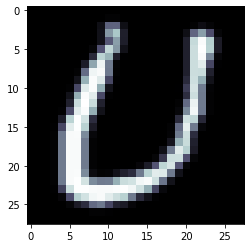

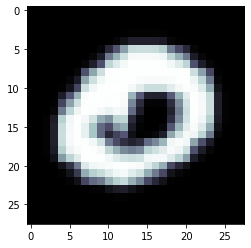

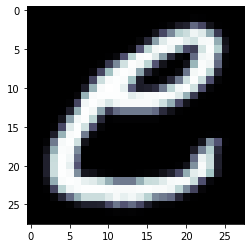

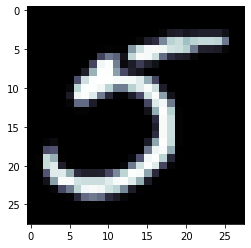

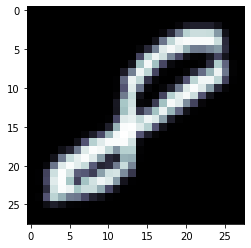

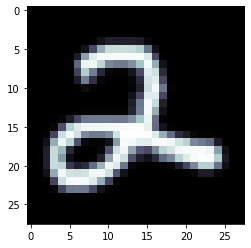

In [ ]:
for i in range(10):
  fig, ax = plt.subplots()
  ax.imshow(np.asarray(data.iloc[i,1:]).reshape(28,28), cmap=plt.cm.bone, interpolation='nearest')

In [ ]:
# Your code here
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = data.iloc[:,1:]

#scaler_data = StandardScaler()

#scaler_data.fit(X)
pca_data = PCA(n_components=10)
pca_data.fit(np.array(X))

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [ ]:
# Your code here
#0-9 number
#10-35 upper
#36 >  lower

data['types'] = data.e.apply(lambda x: 'number' if int(x) <= 9 else('upper' if int(x) > 9 and int(x)<=35 else 'lower' ))

In [ ]:
data.head()

,e,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,types
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,lower
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,number
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,number
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,upper
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,upper


In [ ]:
data['types'].value_counts()

number    57918
upper     31345
lower     27059
Name: types, dtype: int64

In [ ]:
upper = data[data['types']=='upper']
x = upper.drop(columns=['e','types'])
y = upper['e']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#upper

In [ ]:
#params = {'random_state': 0, 'max_depth': 4}
#**params
tree_pic = DecisionTreeClassifier()
tree_pic.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#upper.head()

In [ ]:
#upper.iloc[:,0]

In [ ]:
y_predict = tree_pic.predict(X_test)
tree_pic.score(X_train, y_train), tree_pic.score(X_test, y_test)

(1.0, 0.7200510448237358)

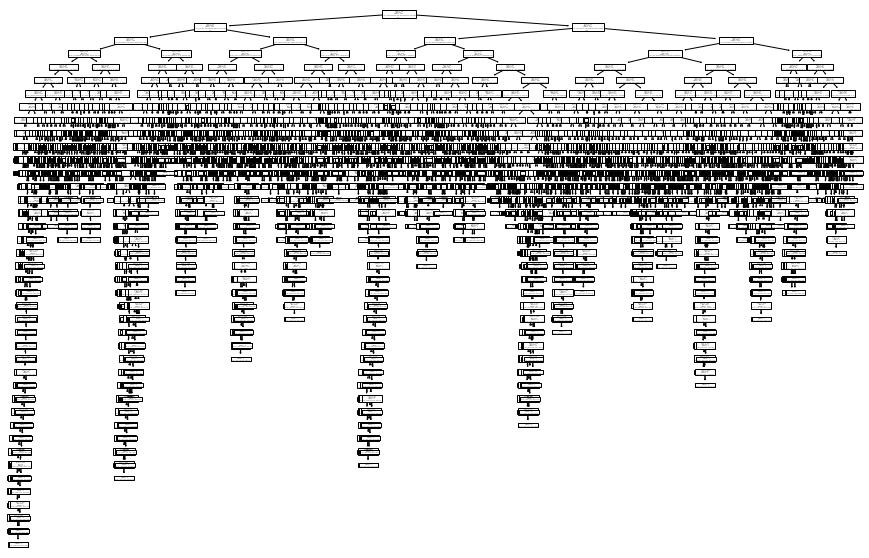

In [ ]:
plt.figure(figsize=(15, 10))
fig = tree.plot_tree(tree_pic)

In [ ]:
forest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = forest.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict.head()

,Actual,Predicted
34451,17.0,23.0
92616,24.0,24.0
89917,14.0,28.0
45693,29.0,29.0
8373,30.0,30.0


* Try to do the same thing with lowercases.

In [ ]:
# Your code here
upper = data[data['types']=='lower']
x = upper.drop(columns=['e','types'])
y = upper['e']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
params = {'random_state': 0, 'max_depth': 4}
tree_pic = DecisionTreeClassifier(**params)
tree_pic.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_predict = tree_pic.predict(X_test)
tree_pic.score(X_train, y_train), tree_pic.score(X_test, y_test)

(0.526354691181226, 0.520879526977088)

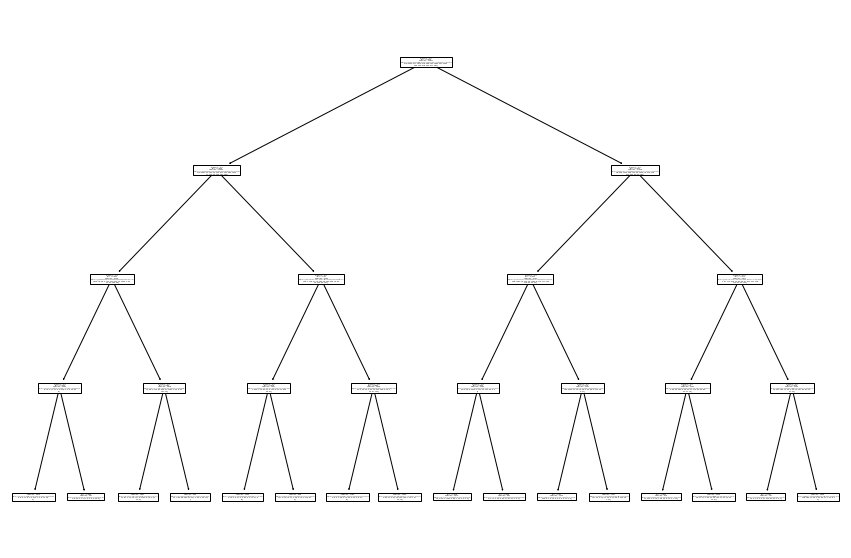

In [ ]:
plt.figure(figsize=(15, 10))
fig = tree.plot_tree(tree_pic)

* Try to do the same thing with numbers.

In [ ]:
# Your code here
# Your code here
upper = data[data['types']=='number']
x = upper.drop(columns=['e','types'])
y = upper['e']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
params = {'random_state': 0, 'max_depth': 4}
tree_pic = DecisionTreeClassifier(**params)
tree_pic.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_predict = tree_pic.predict(X_test)
tree_pic.score(X_train, y_train), tree_pic.score(X_test, y_test)

(0.6602279103897786, 0.665832182320442)

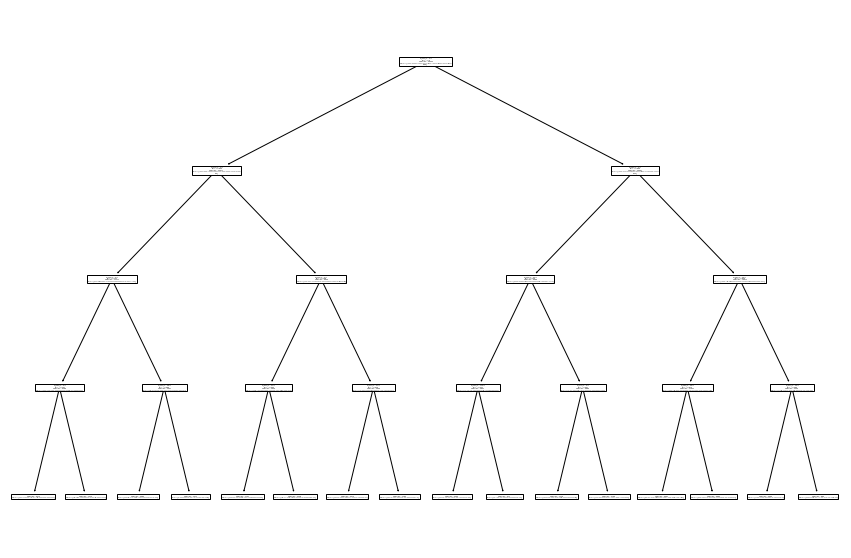

In [ ]:
plt.figure(figsize=(15, 10))
fig = tree.plot_tree(tree_pic)